In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

DATA_PATH = "/Users/admin/Iqbal/Study/OpenCV/LearnOpenCV/src/res/opencv-courses/"

In [70]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Text(0.5, 1.0, 'Grayscale Image')

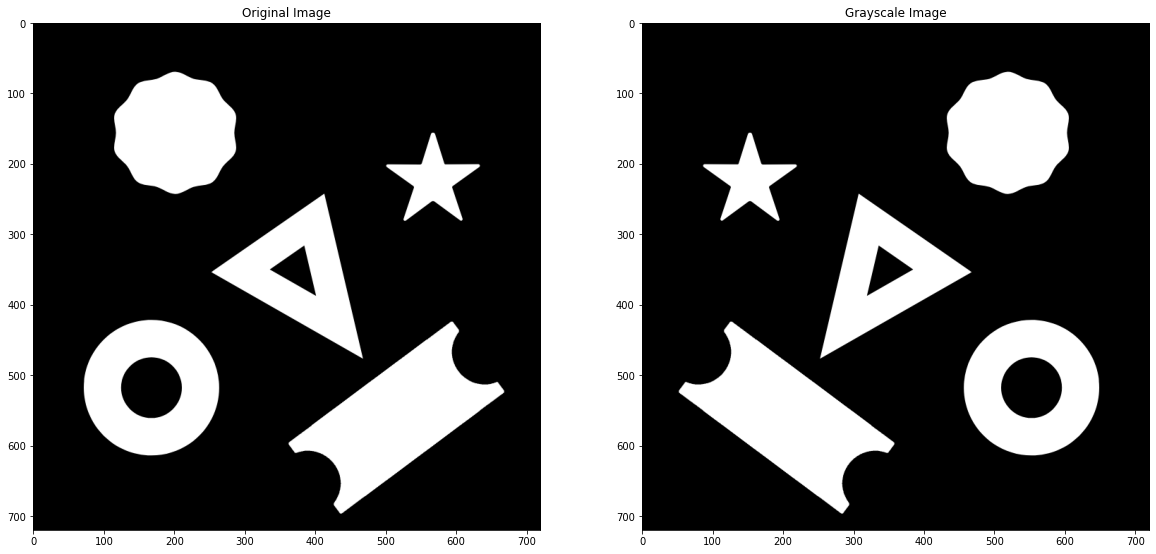

In [71]:
im = cv2.imread(DATA_PATH + "images/Contour.png")
imCopy = im.copy()

#Convert to grayscale
imGray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# print(im.shape)
# print(imGray.shape)

#Display Image
plt.figure()
plt.subplot(121);
plt.imshow(im[..., ::-1]);
plt.title("Original Image")
plt.subplot(122);
plt.imshow(imGray[..., ::-1]);
plt.title("Grayscale Image")

In [72]:
contours, hierarchy = cv2.findContours(imGray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print("Numbers of contours found = {}".format(len(contours)))
print("\nHierarchy : \n{}".format(hierarchy))

Numbers of contours found = 7

Hierarchy : 
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [-1  5 -1 -1]]]


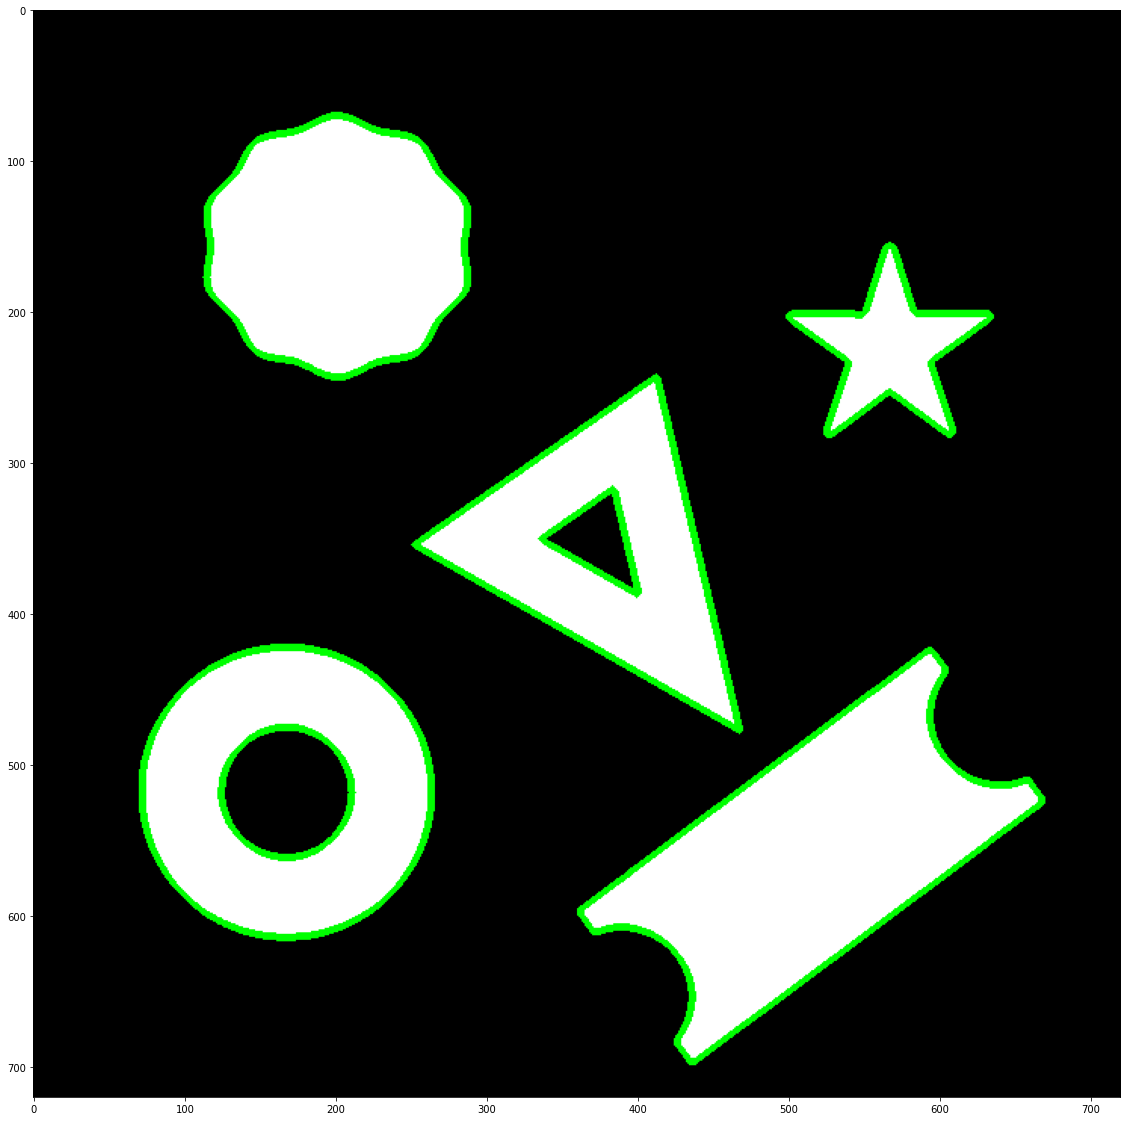

In [73]:
# Draw all the contours
cv2.drawContours(im, contours, -1, (0, 255, 0), 3)
plt.imshow(im[..., ::-1])

Numbers of contours found = 5


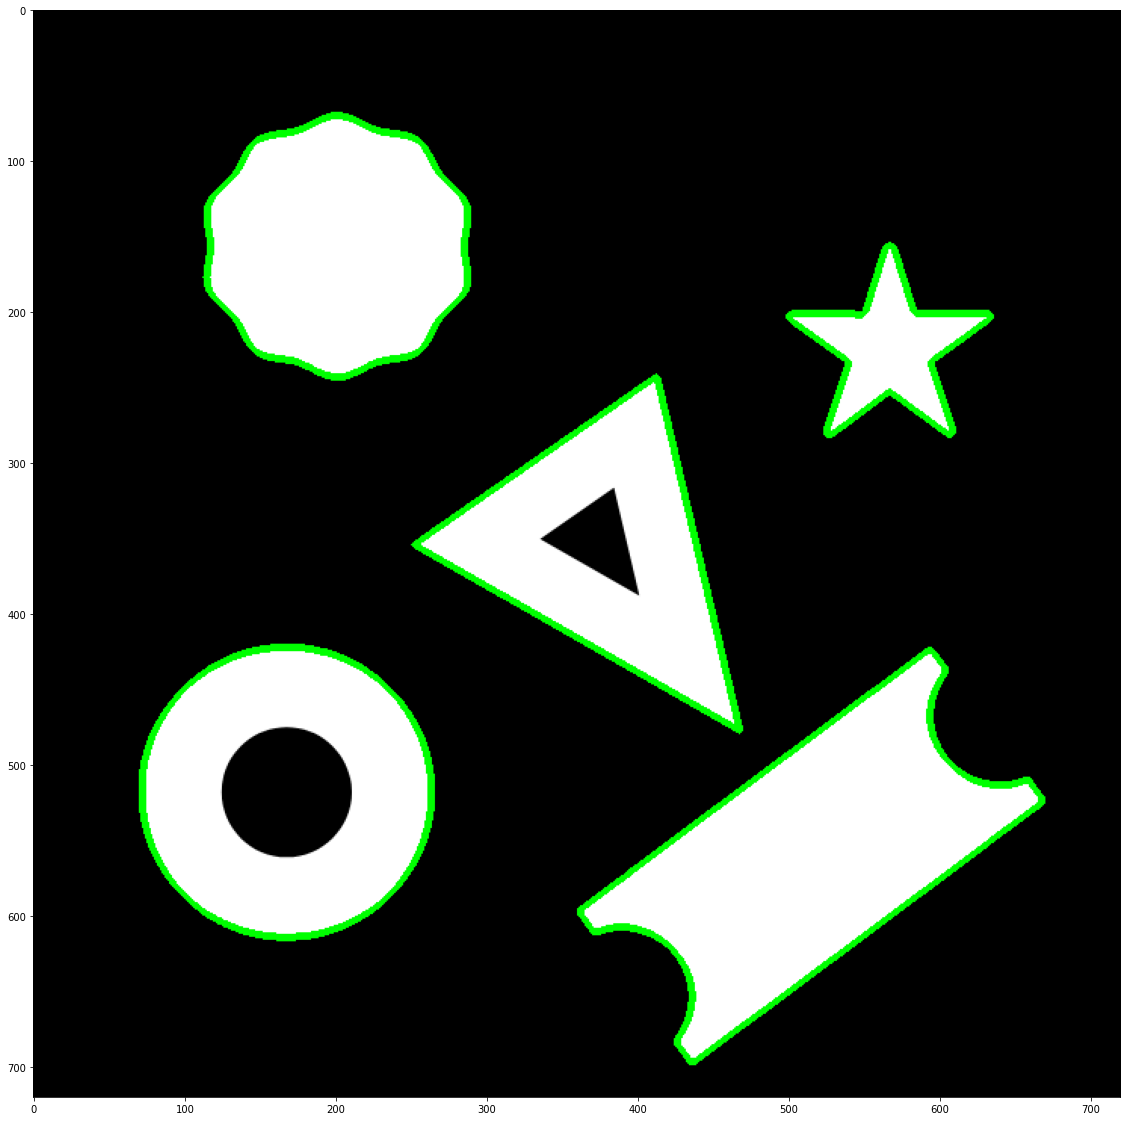

In [74]:
contours, hierarchy = cv2.findContours(imGray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Numbers of contours found = {}".format(len(contours)))
image = imCopy.copy()

# Draw all the contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image[..., ::-1])

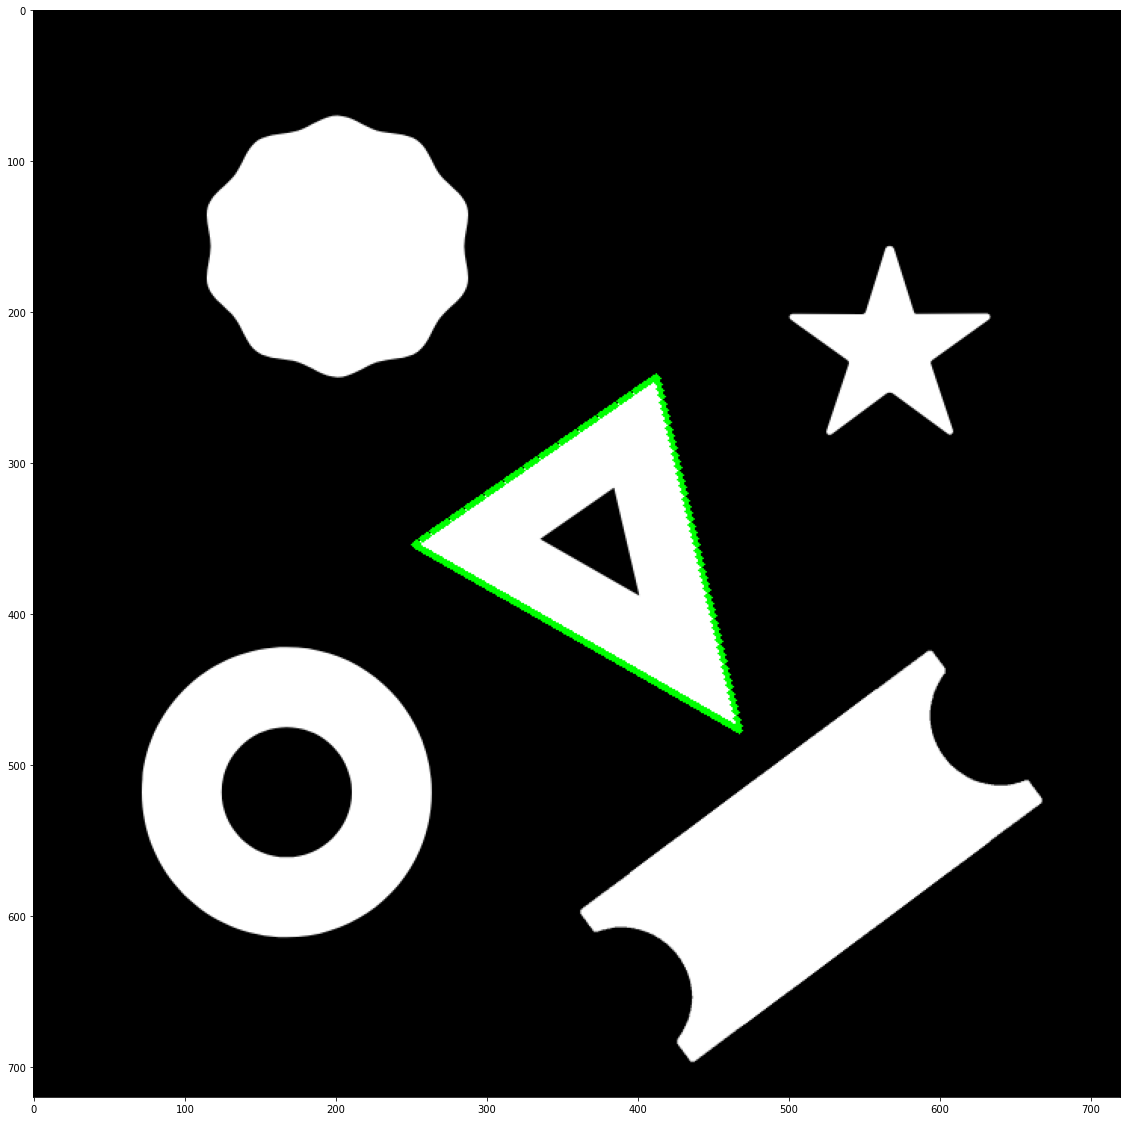

In [75]:
# Draw only the 3rd Contour
image = imCopy.copy()
cv2.drawContours(image, contours[2], -1, (0, 255, 0), 3)
plt.imshow(image[..., ::-1])

Center of Mass

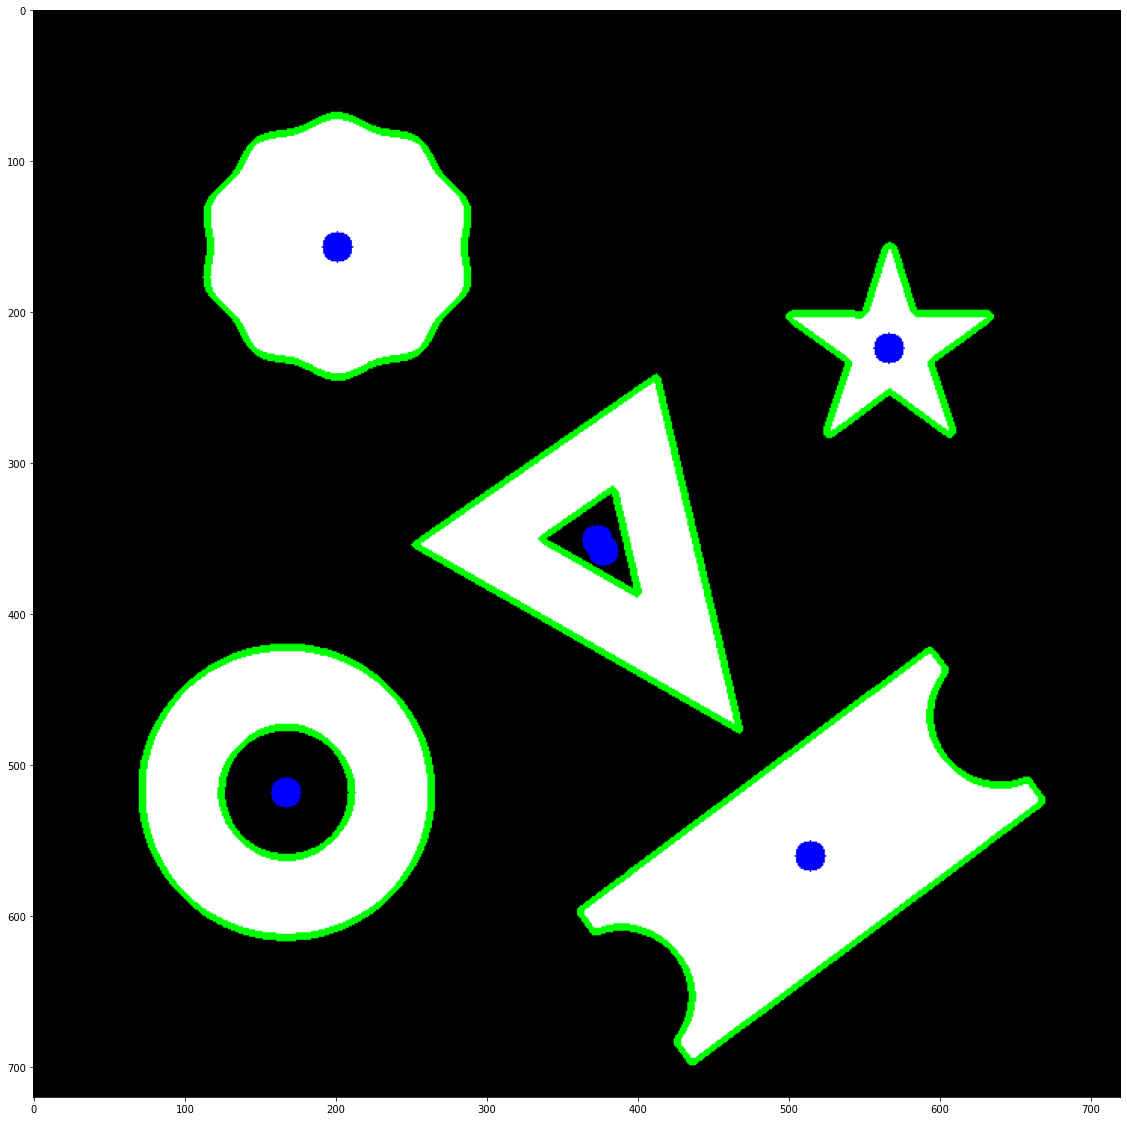

In [76]:
contours, hierarchy = cv2.findContours(imGray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

for cnt in contours:
    # Find countour moments to find the centroid
    M = cv2.moments(cnt)
    x = int(round(M["m10"] / M["m00"]))
    y = int(round(M["m01"] / M["m00"]))

    cv2.circle(image, (x, y), 10, (255, 0, 0), -1)

plt.imshow(image[:,:,::-1])

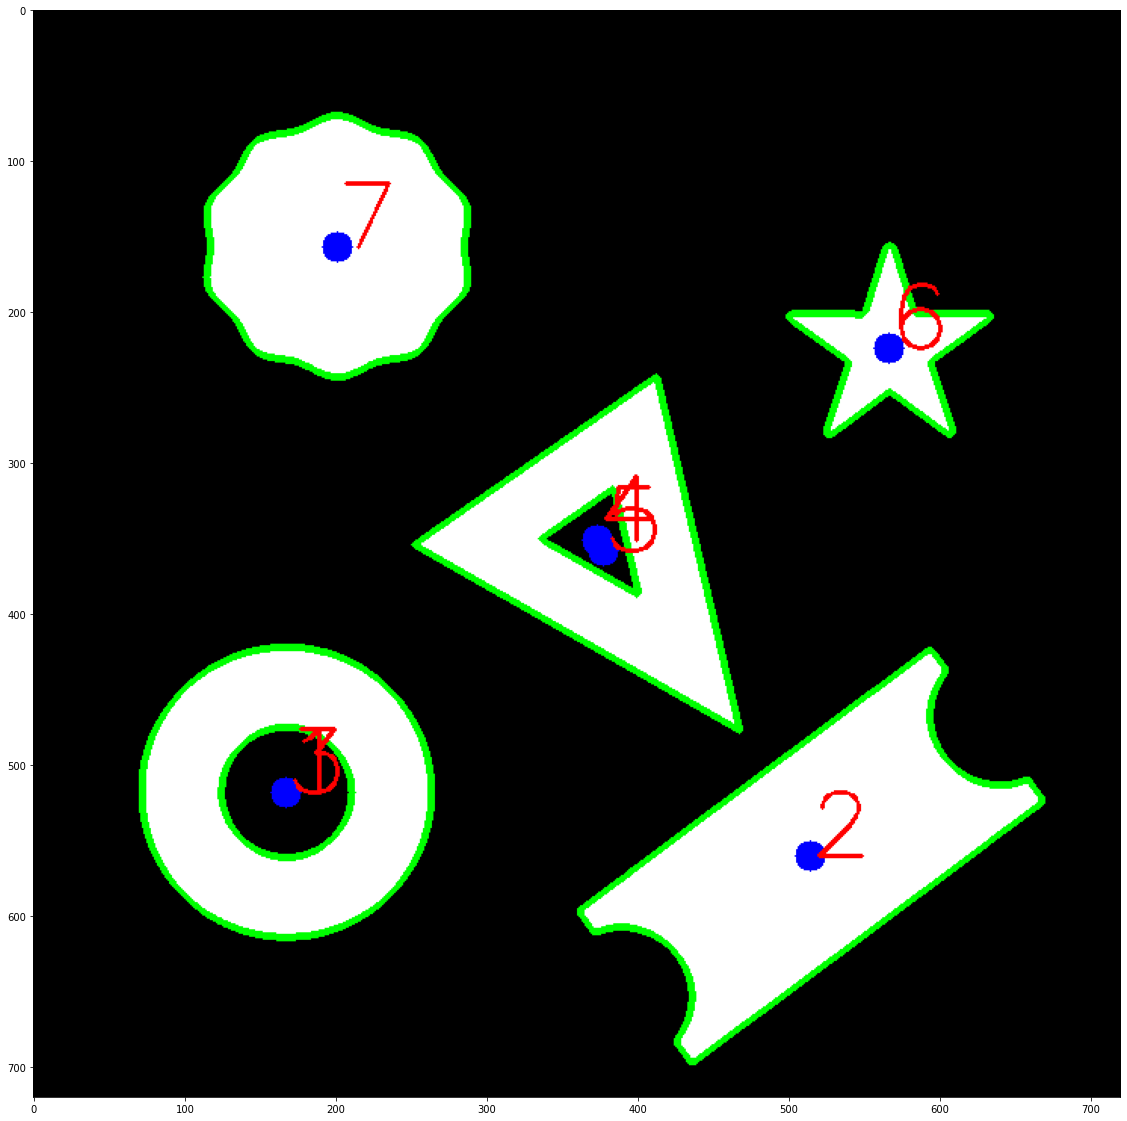

In [77]:
contours,hierarchy = cv2.findContours(imGray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image,contours,-1,(0,255,0),3)

for index,cnt in enumerate(contours):
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))

    cv2.circle(image,(x,y),10,(255,0,0),-1)
    cv2.putText(image,f"{index+1}",(x,y),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255),2)

imageCopy = image.copy()

plt.imshow(imageCopy[...,::-1])

Area and Perimeter

In [78]:
for index,cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)

    print("Contour #{} has area = {} and perimeter = {}".format(index+1,area,perimeter))

Contour #1 has area = 5797.0 and perimeter = 285.0782080888748
Contour #2 has area = 31898.0 and perimeter = 938.8813602924347
Contour #3 has area = 28977.5 and perimeter = 635.369619846344
Contour #4 has area = 2002.0 and perimeter = 216.4507908821106
Contour #5 has area = 21896.5 and perimeter = 728.707710981369
Contour #6 has area = 6214.5 and perimeter = 525.1442201137543
Contour #7 has area = 22854.0 and perimeter = 579.3279893398285


Bounding Box

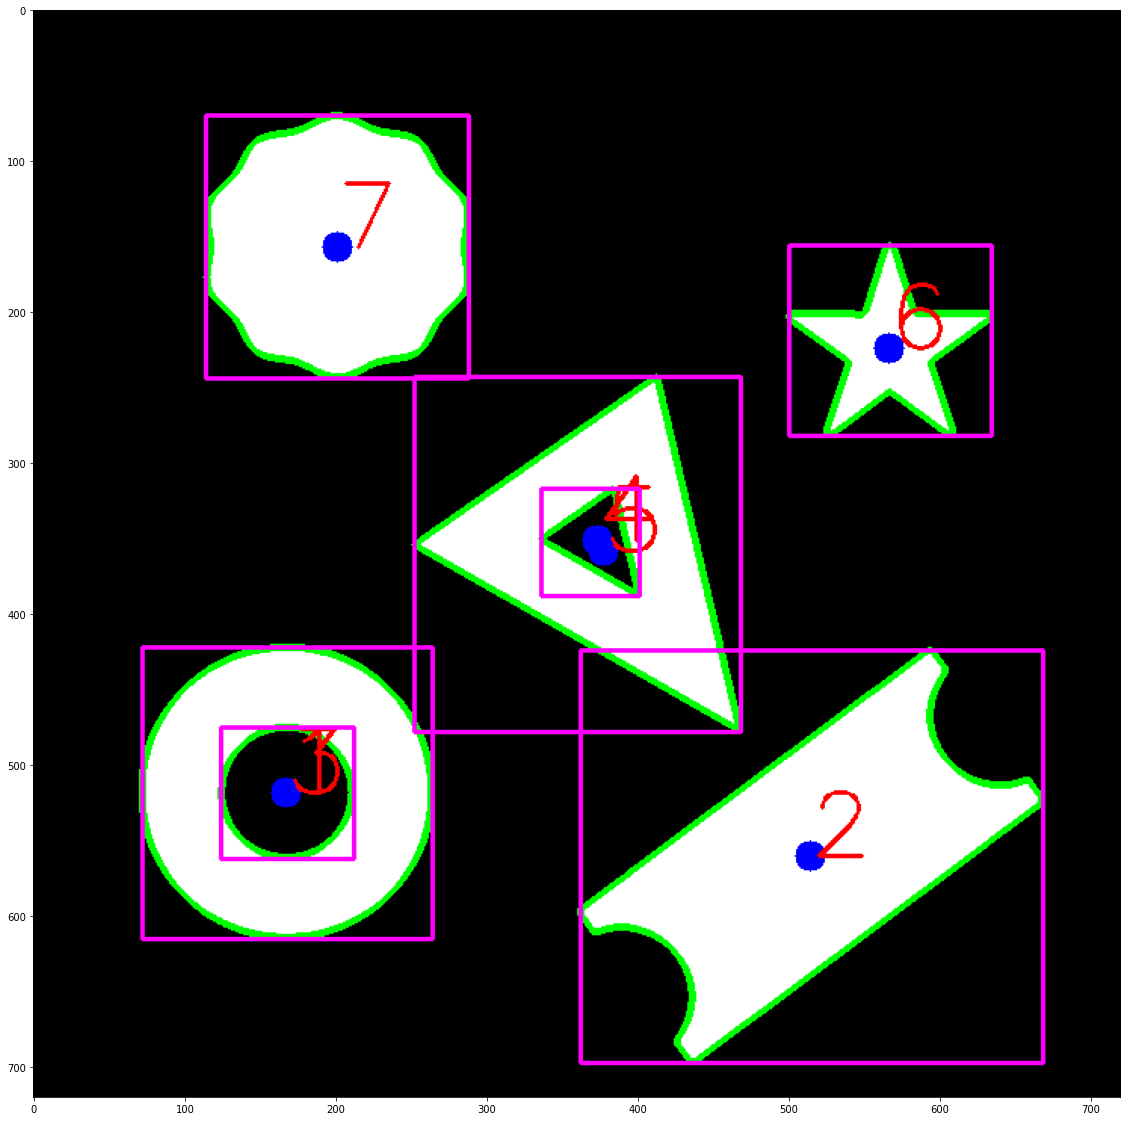

In [79]:
image = imageCopy.copy()

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)
plt.imshow(image[...,::-1])

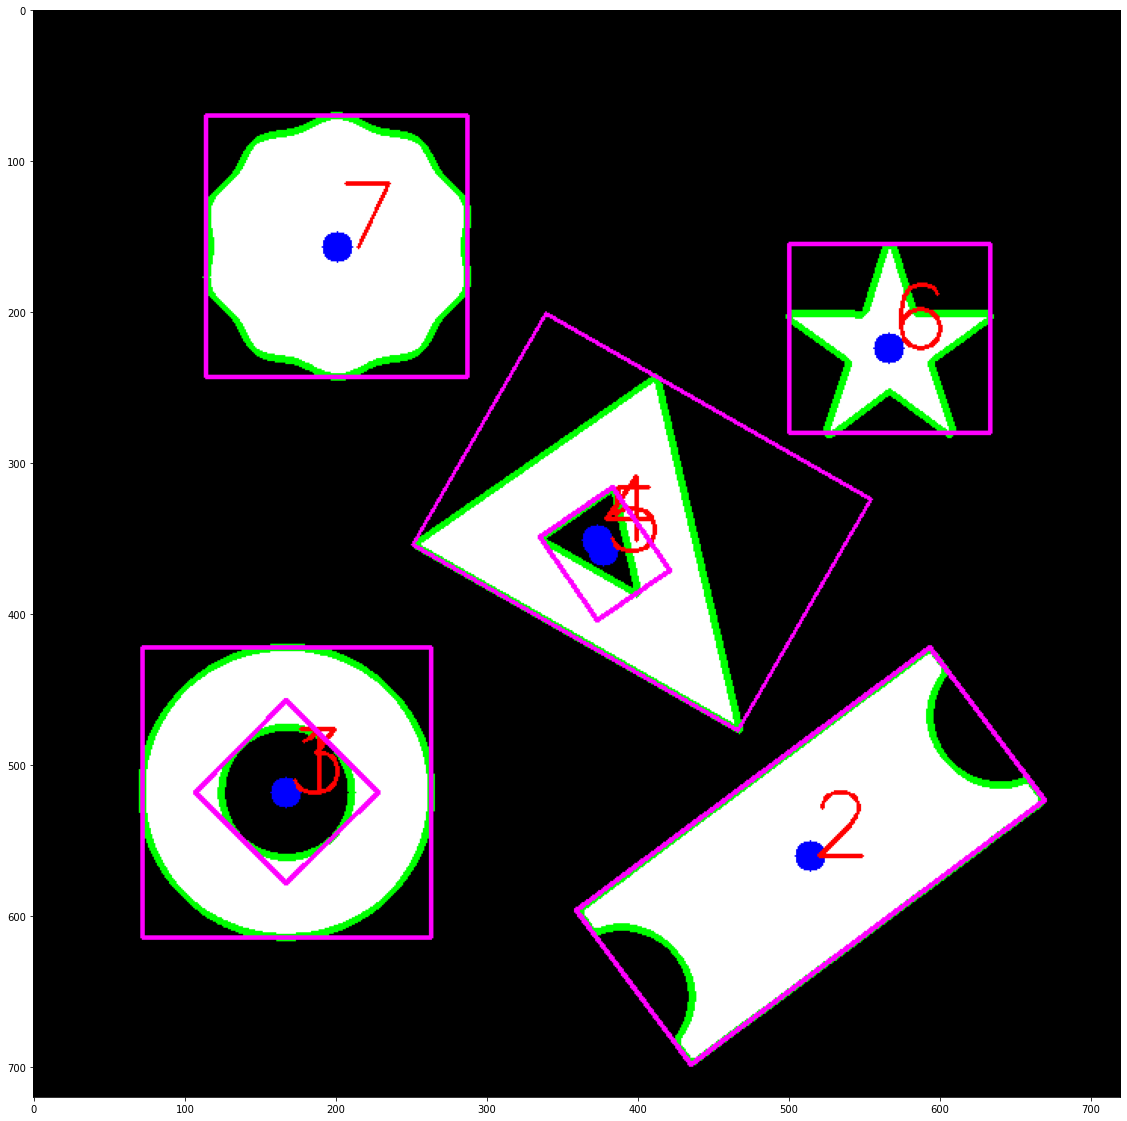

In [80]:
image = imageCopy.copy()

for cnt in contours:
    box = cv2.minAreaRect(cnt)
    boxPts = np.int0(cv2.boxPoints(box))
    # rotatd rounding box
    cv2.drawContours(image,[boxPts],-1,(255,0,255),2)

plt.imshow(image[...,::-1])


Fit a circle and ellipse

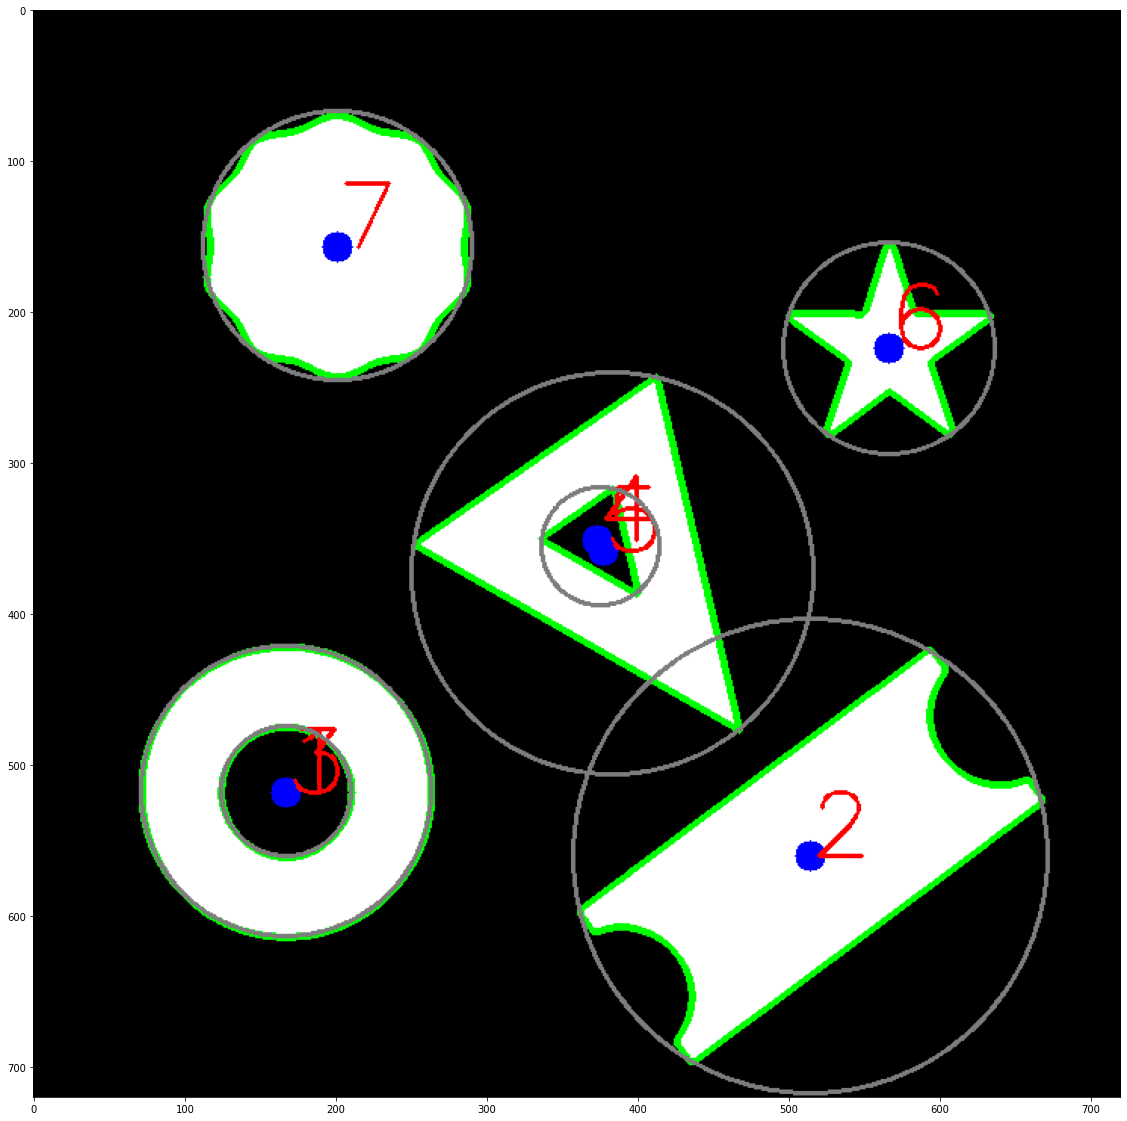

In [81]:
image = imageCopy.copy()

for cnt in contours:
    center, radius = cv2.minEnclosingCircle(cnt)
    cv2.circle(image,(int(center[0]),int(center[1])),int(radius),(125,125,125),2)

plt.imshow(image[...,::-1])

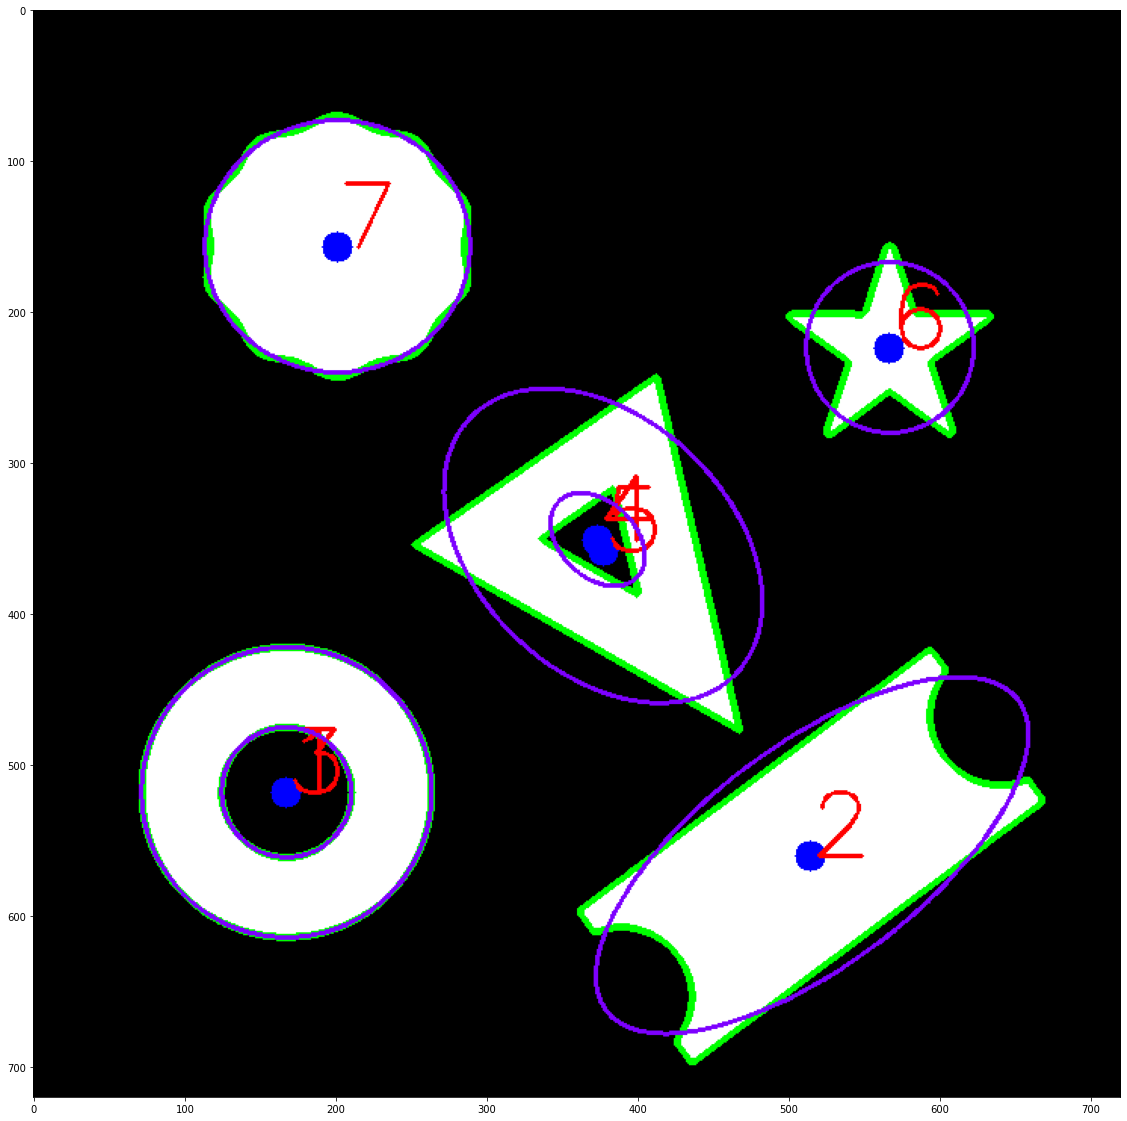

In [82]:
image = imageCopy.copy()

for cnt in contours:
    if len(cnt) < 5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(image,ellipse,(255,0,125),2)

plt.imshow(image[...,::-1])